In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [38]:
df=pd.read_csv("/content/Salary_Data.csv")

In [39]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


# EDA and Data Visualization

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [41]:
df.shape

(30, 2)

In [42]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [43]:
df.isna().value_counts()

YearsExperience  Salary
False            False     30
dtype: int64

<Axes: xlabel='YearsExperience', ylabel='Salary'>

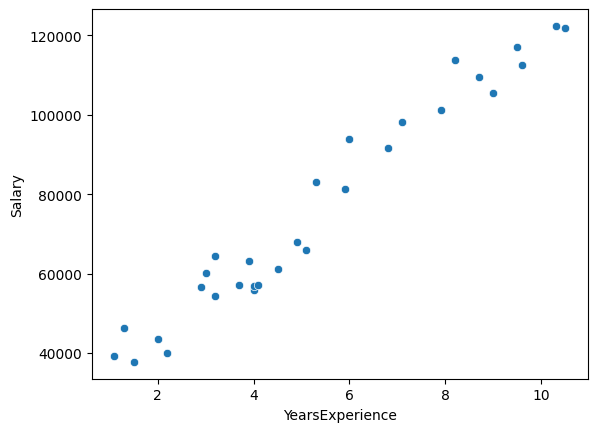

In [44]:
sns.scatterplot(x="YearsExperience",y="Salary",data=df)

In [45]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<Axes: >

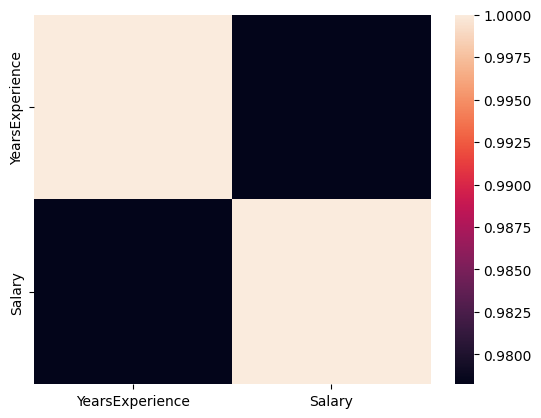

In [46]:
sns.heatmap(df.corr())

array([[<Axes: title={'center': 'YearsExperience'}>,
        <Axes: title={'center': 'Salary'}>]], dtype=object)

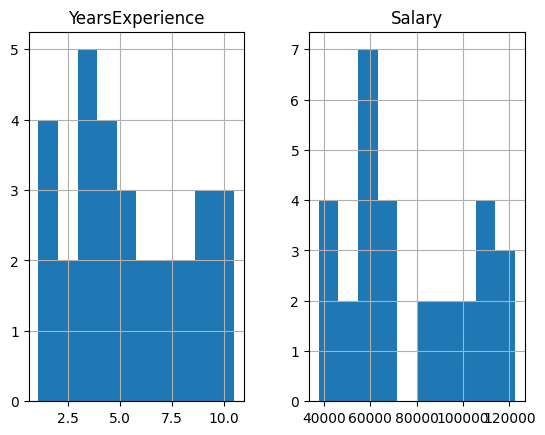

In [47]:
df.hist()

# Model Building

In [48]:

model=smf.ols("Salary~YearsExperience",data=df).fit()

In [49]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sat, 07 Oct 2023   Prob (F-statistic):           1.14e-20
Time:                        10:32:25   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
ypred=model.predict(df['YearsExperience'])

In [51]:
ypred

0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64

<Axes: xlabel='YearsExperience', ylabel='Salary'>

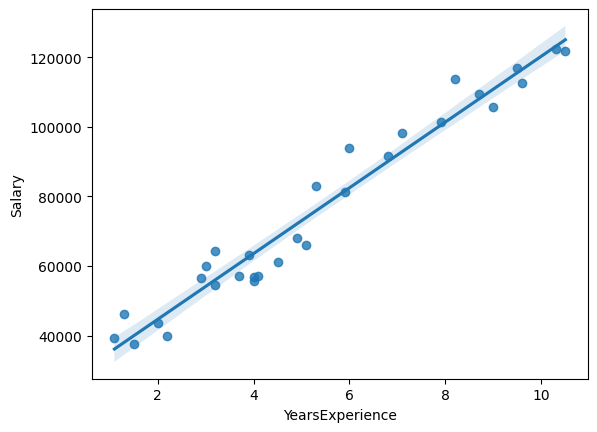

In [52]:
sns.regplot(x='YearsExperience',y='Salary',data=df)

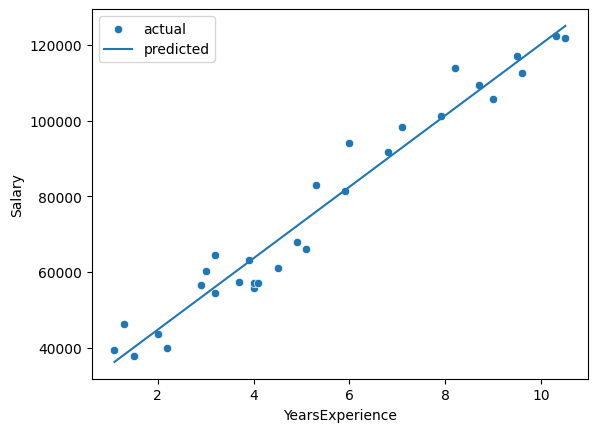

In [53]:
sns.scatterplot(x='YearsExperience',y='Salary',data=df,label='actual')
sns.lineplot(x='YearsExperience',y=ypred,data=df,label='predicted')
plt.legend()

# Predictions

In [54]:
new_data=pd.Series([5,8])
new_data

0    5
1    8
dtype: int64

In [55]:
data=pd.DataFrame(new_data,columns=['YearsExperience'])

In [56]:
model.predict(data)

0     73042.011806
1    101391.898770
dtype: float64